## Récupération et préparation des données


In [7]:
from typing import List, Dict
import os
import re
import numpy as np
import pandas as pd
from fredapi import Fred
import requests

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from skfin.dataloaders.cache import CacheManager

ModuleNotFoundError: No module named 'skfin'

In [8]:
def load_fred_md():
    # Dataset principal
    url_data = "https://raw.githubusercontent.com/lxsd111/ML_PM/main/nbs/data/2025-09-MD.csv"
    df = pd.read_csv(url_data, index_col=0)

    # Conversion de l'index en dates si possible
    try:
        df.index = pd.to_datetime(df.index)
    except:
        pass
    
    return df

def load_transform_codes():
    url_codes = "https://raw.githubusercontent.com/lxsd111/ML_PM/main/nbs/data/FRED-MD_updated_appendix.csv"
    # cp1252 (a.k.a. windows-1252) fixes the 0x92 decode error
    return pd.read_csv(url_codes, encoding="cp1252")  # or encoding="latin1"


# Chargement des deux fichiers
df = load_fred_md()
transform_codes = load_transform_codes()

df.head(), transform_codes.head()

C:\Users\user\AppData\Local\Temp\ipykernel_32012\1971620678.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


(                 RPI  W875RX1  DPCERA3M086SBEA    CMRMTSPLx      RETAILx  \
 sasdate                                                                    
 Transform:     5.000      5.0            5.000       5.0000      5.00000   
 1/1/1959    2583.560   2426.0           15.188  276676.8154  17689.23968   
 2/1/1959    2593.596   2434.8           15.346  278713.9773  17819.01912   
 3/1/1959    2610.396   2452.7           15.491  277775.2539  17967.91336   
 4/1/1959    2627.446   2470.0           15.435  283362.7075  17978.97983   
 
              INDPRO  IPFPNSS  IPFINAL  IPCONGD  IPDCONGD  ...  \
 sasdate                                                   ...   
 Transform:   5.0000   5.0000   5.0000   5.0000    5.0000  ...   
 1/1/1959    21.9616  23.3868  22.2620  31.6664   18.9498  ...   
 2/1/1959    22.3917  23.7024  22.4549  31.8987   19.0492  ...   
 3/1/1959    22.7142  23.8459  22.5651  31.8987   19.4223  ...   
 4/1/1959    23.1981  24.1903  22.8957  32.4019   19.5466  ... 

In [ ]:
CACHE_DIR = Path("data")
CACHE_DIR.mkdir(parents=True, exist_ok=True)

cm = CacheManager(cache_dir=CACHE_DIR)

FILENAME = CACHE_DIR / "FRED_ALL.parquet"

# Sauvegarde correcte des deux DataFrames
cm.save_to_cache(df, FILENAME)

Shape : (801, 126)

Aperçu :


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
4/1/2025,20698.762,16739.9,123.748,1555663.0,721789.0,103.6224,101.3671,101.1112,101.6979,101.0930,...,119.658,131.767,32.22,36.96,28.78,52.2,554180.13,940362.47,5500.0706,32.5116
5/1/2025,20581.743,16703.7,123.575,1550522.0,716101.0,103.6570,101.4038,101.1856,101.5808,102.5239,...,119.780,132.071,32.31,37.08,28.87,52.2,551829.26,938763.49,5526.3170,20.3620
6/1/2025,20575.971,16664.7,123.894,1556845.0,723033.0,104.2115,101.7271,101.5445,101.9628,101.0181,...,120.208,132.386,32.40,37.23,28.94,60.7,549682.41,937344.92,5555.2136,18.3246
7/1/2025,20625.729,16718.9,124.370,1565742.0,727414.0,103.8194,101.4573,101.4961,101.7345,100.6594,...,120.036,132.778,32.47,37.28,29.01,61.7,547389.12,934567.19,5585.9624,16.4718
8/1/2025,20646.475,16726.7,124.805,NaN,732010.0,103.9203,101.5916,101.7216,102.1138,101.2996,...,120.329,133.209,32.56,37.47,29.03,58.2,NaN,NaN,5624.3483,15.7545


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0
1/1/1959,2583.560,2426.0,15.188,276676.8154,17689.23968,21.9616,23.3868,22.2620,31.6664,18.9498,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
2/1/1959,2593.596,2434.8,15.346,278713.9773,17819.01912,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
3/1/1959,2610.396,2452.7,15.491,277775.2539,17967.91336,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
4/1/1959,2627.446,2470.0,15.435,283362.7075,17978.97983,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN



Info générale :
<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, Transform: to 8/1/2025
Columns: 126 entries, RPI to VIXCLSx
dtypes: float64(102), int64(24)
memory usage: 827.0+ KB

Statistiques descriptives :


,count,mean,std,min,25%,50%,75%,max
RPI,801.0,9676.729325,5178.645586,5.0,5148.70000,8487.7830,1.378992e+04,2.291842e+04
W875RX1,801.0,8232.720100,4100.614248,5.0,4583.40000,7313.2000,1.162490e+04,1.673990e+04
DPCERA3M086SBEA,801.0,57.303749,31.316873,5.0,29.11000,49.2540,8.440900e+01,1.248050e+02
CMRMTSPLx,800.0,830302.892373,390470.834014,5.0,489278.73300,723941.2880,1.185876e+06,1.565742e+06
RETAILx,801.0,223252.860662,192090.783435,5.0,50436.91873,159921.0000,3.557920e+05,7.320100e+05
...,...,...,...,...,...,...,...,...
UMCSENTx,647.0,84.690572,13.659669,2.0,74.20000,88.6000,9.470000e+01,1.120000e+02
DTCOLNVHFNM,800.0,142905.059450,146268.035165,6.0,10828.25000,81295.5000,2.696548e+05,5.597089e+05
DTCTHFNM,800.0,359727.393038,341935.326025,6.0,34319.00000,190899.8750,7.316298e+05,9.493062e+05
INVEST,801.0,1378.618822,1538.347702,6.0,192.31560,756.0017,2.143176e+03,5.846708e+03



Nombre de lignes dupliquées : 0

Valeurs manquantes par colonne :


CMRMTSPLx          1
PERMIT            12
PERMITNE          12
PERMITMW          12
PERMITS           12
PERMITW           12
ACOGNO           398
ANDENOx          109
BUSINVx            1
ISRATIOx           1
NONREVSL           1
CONSPI             1
S&P div yield      2
S&P PE ratio       1
CP3Mx              1
COMPAPFFx          1
TWEXAFEGSMTHx    168
UMCSENTx         154
DTCOLNVHFNM        1
DTCTHFNM           1
VIXCLSx           42
dtype: int64


Pourcentage de valeurs manquantes :


ACOGNO           49.687890
TWEXAFEGSMTHx    20.973783
UMCSENTx         19.225968
ANDENOx          13.607990
VIXCLSx           5.243446
                   ...    
PCEPI             0.000000
CES3000000008     0.000000
CES2000000008     0.000000
CES0600000008     0.000000
INVEST            0.000000
Length: 126, dtype: float64

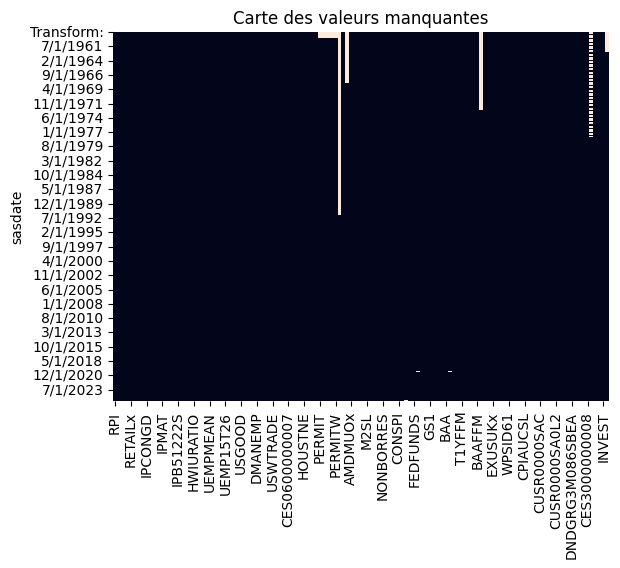


Types de données :
RPI                float64
W875RX1            float64
DPCERA3M086SBEA    float64
CMRMTSPLx          float64
RETAILx            float64
                    ...   
UMCSENTx           float64
DTCOLNVHFNM        float64
DTCTHFNM           float64
INVEST             float64
VIXCLSx            float64
Length: 126, dtype: object
\ Pas d'index temporel, vérifie la colonne 'date' ou équivalent.


C:\Users\user\AppData\Local\Temp\ipykernel_32012\166577888.py:41: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  fred_all = df.apply(pd.to_numeric, errors='ignore')


In [13]:
# Inspection initiale
print("Shape :", df.shape)
print("\nAperçu :")
display(df.tail())
display(df.head())
 
print("\nInfo générale :")
df.info()
 
print("\nStatistiques descriptives :")
display(df.describe().T)
 
# Vérification des doublons
n_duplicates = df.duplicated().sum()
print(f"\nNombre de lignes dupliquées : {n_duplicates}")
 
if n_duplicates > 0:
    df = df.drop_duplicates()
    print("Doublons supprimés.")
 
# Vérification des NaN
print("\nValeurs manquantes par colonne :")
missing = df.isna().sum()
display(missing[missing > 0])
 
# % de NaN
print("\nPourcentage de valeurs manquantes :")
display((df.isna().mean() * 100).sort_values(ascending=False))
 
# plt.figure(figsize=(10,4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Carte des valeurs manquantes")
plt.show()
 
 
# Vérification des types
print("\nTypes de données :")
print(df.dtypes)
 
# Conversion automatique si certaines colonnes devraient être numériques
fred_all = df.apply(pd.to_numeric, errors='ignore')
 
# Vérification d’index temporel
if isinstance(df.index, pd.DatetimeIndex):
    print("\nIndex temporel détecté ")
    print(f"Fréquence estimée : {pd.infer_freq(df.index)}")
else:
    print("\ Pas d'index temporel, vérifie la colonne 'date' ou équivalent.")

In [ ]:
# === 2) Appliquer (ou pas) les transformations ===
df_transformed = pd.DataFrame(index=df.index)


for col in df.columns:
    if col not in transform_codes.index:
            # pas de mapping → on laisse tel quel
        s = df[col]
    else:
        code = int(transform_codes.loc[col, "tcode"])
        s = df[col]

        if code == 1:
            s = s
        elif code == 2:
            s = s.diff()
        elif code == 3:
            s = s.diff().diff()
        elif code == 4:
            # log niveau → attention aux valeurs <= 0
            s = s.where(s > 0).apply(np.log)
        elif code == 5:
            s = s.where(s > 0).apply(np.log).diff()
        elif code == 6:
            s = s.where(s > 0).apply(np.log).diff().diff()
        else:
        # codes atypiques (ex. 7) → on laisse tel quel
            s = s

    df_transformed[col] = s    

# === 3) Nettoyage optionnel ===
# # Supprime les premières lignes avec NaN (utile si APPLY_TRANSFORMS=True)
# df_transformed = df_transformed.dropna()

# Aperçu
df_transformed.head()

C:\Users\user\AppData\Local\Temp\ipykernel_32012\3173755572.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_transformed[col] = s
C:\Users\user\AppData\Local\Temp\ipykernel_32012\3173755572.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_transformed[col] = s
C:\Users\user\AppData\Local\Temp\ipykernel_32012\3173755572.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
Transform:,5.000,5.0,5.000,5.000,5.0,5.0000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.00,6.0000,1.0000
2/1/1992,8444.994,7290.1,49.123,718889.123,159189.0,61.9192,70.4258,68.6473,80.2867,57.8121,...,67.191,52.129,11.89,13.67,11.30,68.8,64066.0,189752.08,744.1699,17.0505
3/1/1992,8457.388,7294.4,49.213,721782.597,158647.0,62.4403,71.0155,69.2529,81.0021,58.9931,...,67.363,52.284,11.92,13.76,11.32,76.0,62992.0,190887.95,749.5390,16.2227
4/1/1992,8487.783,7313.2,49.254,726592.639,159921.0,62.9199,71.5453,69.7742,81.7607,60.0895,...,67.390,52.481,11.96,13.77,11.36,77.2,64280.0,190911.80,756.0017,16.1885
5/1/1992,8531.932,7352.4,49.509,720270.973,160471.0,63.1268,71.9413,70.1855,82.2969,61.9726,...,67.482,52.543,11.97,13.77,11.39,79.2,62212.0,190975.14,765.6030,14.7280
